# Praktikum Mandiri | Tugas Pertemuan 04

**Nama: Reva Aulia Faradilah**

**NIM: 0110222145**

**Kelas: TI08 - 2022 - ML Pagi**

---

**Praktikum04**

# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

# 2. Membaca Data File CSV

In [2]:
# Menghubungkan colaboratory dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os

# Memanggil dataset melalui gdrive
path = "gdrive/MyDrive/MachineLearning/praktikum04/data/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Membaca file calonpembelimobil.csv
df = pd.read_csv(path + 'calonpembelimobil.csv')
df

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1
...,...,...,...,...,...,...,...
995,996,51,0,1,2,293,1
996,997,61,1,0,2,275,1
997,998,45,1,0,0,406,1
998,999,48,0,1,2,432,1


# 3. Melihat Informasi Umum Dataset

In [4]:
# Melihat Informasi Umum Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


# 4. Menentukan Variabel Independen dan Dependen

In [5]:
# Memisahkan data menjadi variabel independen (X) dan dependen (y)
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

# 5. Membagi Dataset (Train) dan (Test)

In [6]:
# Membagi data menjadi data latih (train) dan data uji (test) dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Melatih Model Logistic Regression

In [7]:
# Membuat model logistic regression
model = LogisticRegression()

# Latih model menggunakan data latih
model.fit(X_train, y_train)

LogisticRegression()

# 7. Menampilkan ROC Curve

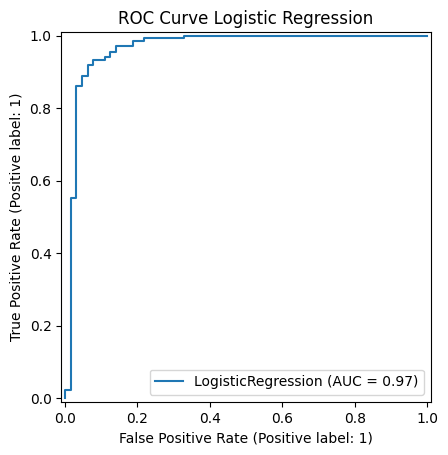

In [8]:
# ROC Curve
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title('ROC Curve Logistic Regression')
plt.show()

# 8. Evaluasi Model dan Classification Report

In [9]:
# Melakukan prediksi terhadap data uji menggunakan model yang telah dilatih
y_pred = model.predict(X_test)

# Evaluasi performa model dan classification report
print("Tingkat Akurasi Model :", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nHasil Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

Tingkat Akurasi Model : 0.93

Confusion Matrix:
 [[ 55   9]
 [  5 131]]

Hasil Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.93      0.91      0.92       200
weighted avg       0.93      0.93      0.93       200



# 9. Menggunakan Dataset Baru untuk Menguji Model

In [10]:
# Buat dataset baru untuk pengujian model
data_baru = pd.DataFrame({
    'Usia': [30, 50, 40, 36, 58, 29],
    'Status': [1, 2, 1, 3, 2, 2],
    'Kelamin': [0, 1, 0, 1, 0, 1],
    'Memiliki_Mobil': [0, 1, 2, 2, 1, 1],
    'Penghasilan': [150, 300, 220, 150, 190, 270]
})
print("Data Baru:\n")
print(data_baru)

print("\n" + "="*80)

# Gunakan model untuk memprediksi data baru
prediksi = model.predict(data_baru)

# Tampilkan hasil prediksi
hasil = data_baru.copy()
hasil['Prediksi_Beli_Mobil'] = prediksi

# Tambahkan kolom keterangan berdasarkan hasil prediksi
hasil['Keterangan'] = hasil['Prediksi_Beli_Mobil'].apply(
    lambda x: 'Membeli Mobil' if x == 1 else 'Tidak Membeli Mobil'
)

print("\nHasil Prediksi Dataset Baru:\n")
print(hasil)

Data Baru:

   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan
0    30       1        0               0          150
1    50       2        1               1          300
2    40       1        0               2          220
3    36       3        1               2          150
4    58       2        0               1          190
5    29       2        1               1          270


Hasil Prediksi Dataset Baru:

   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Prediksi_Beli_Mobil  \
0    30       1        0               0          150                    0   
1    50       2        1               1          300                    1   
2    40       1        0               2          220                    1   
3    36       3        1               2          150                    0   
4    58       2        0               1          190                    0   
5    29       2        1               1          270                    1   

            Keterangan  
0  Tid

In [12]:
# Hitung total jumlah Dataset Baru
print(f"Total Data Baru: {len(data_baru)}")

# Total prediksi membeli mobil [1]
print(f"Diprediksi Beli: {sum(prediksi)} data")

# Total prediksi tidak membeli mobil [0]
print(f"Diprediksi Tidak Membeli: {len(prediksi) - sum(prediksi)} data")

# Persentase yang membeli mobil dari dara baru
print(f"Persentase Prediksi yang Membeli Mobil: {sum(prediksi)/len(prediksi):.1%}")

Total Data Baru: 6
Diprediksi Beli: 3 data
Diprediksi Tidak Membeli: 3 data
Persentase Prediksi yang Membeli Mobil: 50.0%
